# Francisco Lucas Sousa Nobre - 392030
## Email: lucasnobrepro2015@gmail.com
## Telefone: (88) 99813-4707
--------------------------------------------------------------------------------------------------------

# PROPHET - algoritmo
O Prophet é um pacote para R e Python usado em produção no Facebook (daí o nome do pacote, fbprophet). Ele implementa o algoritmo de previsão de séries temporais, programado para detectar automaticamente os padrões sazonais de uma série de input. Contudo, é possível customizar alguns inputs de parâmetros manualmente, como indicar a presença de períodos sazonais (semanal ou anual), feriados e changepoints.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet

In [25]:
# lendo dataset's
df_1 = pd.read_csv('data_1__.csv')
df_2 = pd.read_csv('data_2__.csv')
df_3 = pd.read_csv('data_3__.csv')

# cocatenando dataset's
frames = [df_1, df_2, df_3]
df = pd.concat(frames)

## Analise de dados

In [9]:
df.describe()

,index,valor
count,2203.000000,2203.000000
mean,619.079891,17392.596192
std,449.402225,22140.179281
min,0.000000,0.020000
25%,239.000000,8028.195000
50%,514.000000,11586.760000
75%,990.500000,17063.325000
max,1541.000000,196344.060000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 71
Data columns (total 3 columns):
index    2203 non-null int64
data     2203 non-null object
valor    2203 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 68.8+ KB


## Pré-processamento de dados

In [11]:
# Crio um dicionario
d = {'ds': df.values[:, 1],'y': df.values[:, 2],}
# Transformo 'd' em um novo banco de dados chamado 'data_'.
data_ = pd.DataFrame(d)
# Mostro as informações do banco de dados.
print('Informações:\n')
data_.info()
print('\n')
print('Dimensões:\n',data_.shape)

Informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 2 columns):
ds    2203 non-null object
y     2203 non-null object
dtypes: object(2)
memory usage: 34.5+ KB


Dimensões:
 (2203, 2)


In [26]:
# Ordenando dataset
data_ = data_.sort_values('ds')
data_.head()

,ds,y
589,2014-07-18,1.5
590,2014-08-05,83.2
591,2014-08-08,22.5
592,2014-08-11,15.91
593,2014-08-12,0.44


In [13]:
data_.shape

(2203, 2)

In [27]:
# pegando o ultimo mes 
last_morth = data_.tail(31)
last_morth.shape

(31, 2)

## Divisão de dados

In [28]:
# Split dos dados
X_train = pd.DataFrame(data_.values[:-31,:],columns=['ds','y'])
X_train.tail(30)
X_train.shape

(2172, 2)

## Criação de modelo

In [16]:
# Instanciando um modelo PROPHET
# changepoint_prior_scale = 1; trata o super ajuste de alterações de taxa no histórico.
m = Prophet(daily_seasonality=True)
#Treinando modelo
m.fit(X_train)

## Treinamento e previsão

In [23]:
# -periods= 30; quer dizer que eu to prevendo 30 dias na frente
future = m.make_future_dataframe(periods=30)
# Calculando a previsão
forecast = m.predict(future)

## Predição: 
--pontos pretos = valores reais lidos  
--linha azul = valores preditos  
--sombra em azul claro = desvio que o o valor predito pode fazer

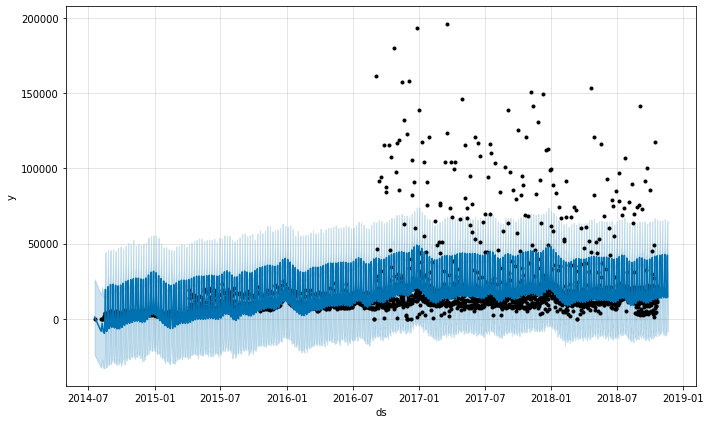

In [24]:
# Gerando graficos
# as funções abaixo plotao um grafico na tela e salva uma imagem com o grafico no diretorio atual.
m.plot(forecast).savefig('model_forecast_regressor.png')

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2197,2018-11-15,13858.262622,-10053.269214,37255.672120
2198,2018-11-16,20418.807488,-2658.840640,45008.981117
2199,2018-11-17,26020.772970,2422.047449,49393.609887
2200,2018-11-18,42359.221951,18001.117093,67694.913514
2201,2018-11-19,14509.935430,-9625.960119,38344.136940


# Analise do periodo de vendas
--Anos  
--Dias da semana  
--Meses do ano  
--Horas do dias  


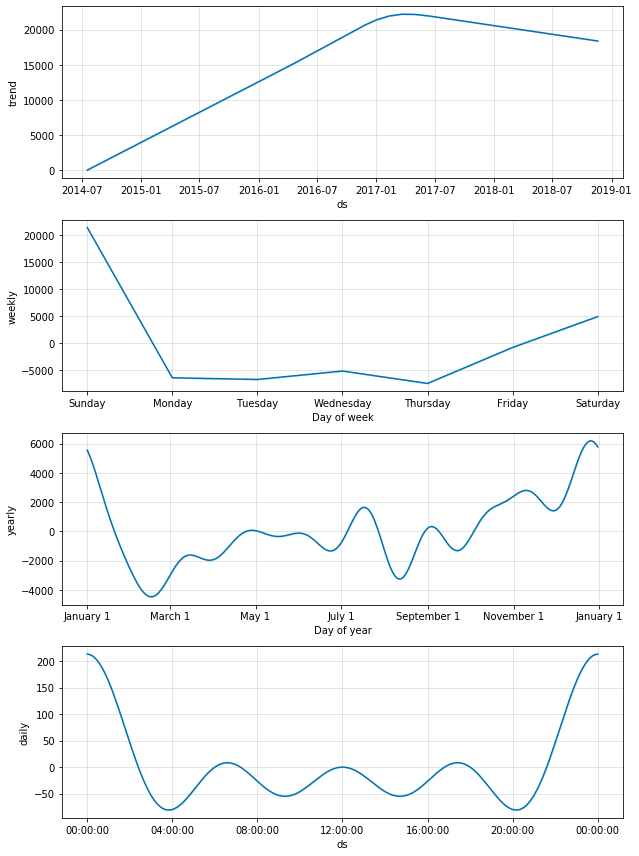

In [21]:
m.plot_components(forecast);